In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
request = requests.get("https://wuzzuf.net/search/jobs/?a=hpb&q=&start=0")
request

<Response [200]>

In [3]:
content = request.content

In [4]:
soup = BeautifulSoup(content, "html.parser")
soup

<!DOCTYPE html>

<html lang="en" translate="no">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport"/>
<meta content="Thu Dec 08 2022 18:30:44 GMT+0200" http-equiv="expires">
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="cache-control"/>
<meta content="notranslate" name="googlebot"/>
<title data-react-helmet="true">Job Search | WUZZUF</title>
<meta charset="utf-8" data-react-helmet="true"><meta content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services." data-react-helmet="true" name="description"><meta content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employment in egypt, Egypt jobs, jobs vacancies, job vacancies in egypt, job search egypt, job v

In [5]:
jobs = soup.find_all("div", class_ = "css-1gatmva e1v1l3u10")
len(jobs)

15

In [6]:
job_name = jobs[4].find_all("h2", class_ = "css-m604qf")[0].text
job_name

'Knowledge Management Technical Lead'

In [7]:
company_name = jobs[1].find_all("div", class_ = "css-d7j1kk")[0].text.split(" - ")[0]
company_name

'New Arab Emirates Careers'

In [8]:
location = jobs[14].find_all("span", class_ = "css-5wys0k")[0].text.split(", ")[0]
location

'Riyadh'

In [9]:
job_type = jobs[2].find_all("span", class_ = "css-1ve4b75 eoyjyou0")[0].text
job_type

'Full Time'

In [10]:
exp_level = jobs[0].find_all("div", class_ = "css-1lh32fc")[0].next_sibling.text.split(" · ")[0]
exp_level

'Entry Level'

In [11]:
exp_years = jobs[0].find_all("div", class_ = "css-1lh32fc")[0].next_sibling.text.split(" · ")[1]
exp_years

'Engineering - Construction/Civil/Architecture'

In [12]:
skills = " ".join(jobs[0].find_all("div", class_ = "css-1lh32fc")[0].next_sibling.text.split(" · ")[2:])
skills

'Project/Program Management Engineering - Mechanical/Electrical Project Management Engineering Civil Engineering Construction Information Technology (IT) Computer Science Architecture'

In [13]:
import pandas as pd
wuzzuf = pd.DataFrame(columns = ["job_name", "company_name", "location", "exp_level", "exp_years", "skills"])
wuzzuf

,job_name,company_name,location,exp_level,exp_years,skills


In [14]:
for job in jobs:
    job_name = job.find_all("h2", class_ = "css-m604qf")[0].text
    company_name = job.find_all("div", class_ = "css-d7j1kk")[0].text.split(" - ")[0]
    location = job.find_all("span", class_ = "css-5wys0k")[0].text.split(", ")[0]
    job_type = job.find_all("span", class_ = "css-1ve4b75 eoyjyou0")[0].text
    exp_level = job.find_all("div", class_ = "css-1lh32fc")[0].next_sibling.text.split(" · ")[0]
    exp_years = job.find_all("div", class_ = "css-1lh32fc")[0].next_sibling.text.split(" · ")[1]

    wuzzuf.loc[len(wuzzuf.index)] = [job_name, company_name, location, job_type, exp_level, exp_years]

In [15]:
wuzzuf

,job_name,company_name,location,exp_level,exp_years,skills
0,Project Engineer,Dar Al RokhamLLC,Dubai,Full Time,Entry Level,Engineering - Construction/Civil/Architecture
1,Document Controller,New Arab Emirates Careers,Dubai,Full Time,Manager,Administration
2,Accountant,Dubai Hiring,Dubai,Full Time,Experienced,Accounting/Finance
3,Administrative Assistant,Dubai Hiring,Dubai,Full Time,Entry Level,Administration
4,Knowledge Management Technical Lead,Peraton,Dubai,Full Time,Not specified,IT/Software Development
5,React native programmer,Arabic Computer Systems ltd,Riyadh,Full Time,Not specified,Installation/Maintenance/Repair
6,Internal Communications Manager,Gilbarco Veeder-Root,Dubai,Full Time,Experienced,Accounting/Finance
7,Remote Data Entry Representative (Work From Home),IFV,Dubai,Full Time,Not specified,Customer Service/Support
8,Health Access Manager,"Pfizer, Inc.",Riyadh,Full Time,Not specified,Customer Service/Support
9,Remote Data Entry Clerks (Work From Home),IFV,Dubai,Full Time,Not specified,Administration


In [16]:
for i in range(534):
    request = requests.get(f"https://wuzzuf.net/search/jobs/?a=hpb&q=&start={i}")
    content = request.content
    soup = BeautifulSoup(content, "html.parser")
    jobs = soup.find_all("div", class_ = "css-1gatmva e1v1l3u10")

    for job in jobs:
        job_name = job.find_all("h2", class_ = "css-m604qf")[0].text
        company_name = job.find_all("div", class_ = "css-d7j1kk")[0].text.split(" - ")[0]
        location = job.find_all("span", class_ = "css-5wys0k")[0].text.split(", ")[0]
        job_type = job.find_all("span", class_ = "css-1ve4b75 eoyjyou0")[0].text
        exp_level = job.find_all("div", class_ = "css-1lh32fc")[0].next_sibling.text.split(" · ")[0]
        exp_years = job.find_all("div", class_ = "css-1lh32fc")[0].next_sibling.text.split(" · ")[1]

        wuzzuf.loc[len(wuzzuf.index)] = [job_name, company_name, location, job_type, exp_level, exp_years]

    if i % 50 == 0:
        print("Done")

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [17]:
wuzzuf.to_csv('wuzzuf_jobs.csv',index=False)

In [18]:
data=pd.read_csv('wuzzuf_jobs.csv')

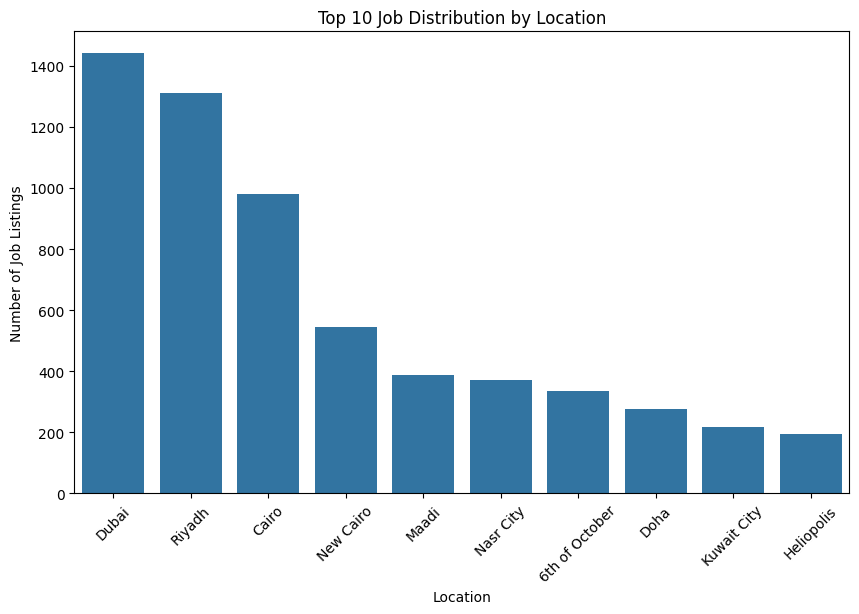

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

location_counts = wuzzuf['location'].value_counts()



# Plotting Job Distribution by Location
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.index[:10], y=location_counts.values[:10])
plt.title('Top 10 Job Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=45)
plt.show()

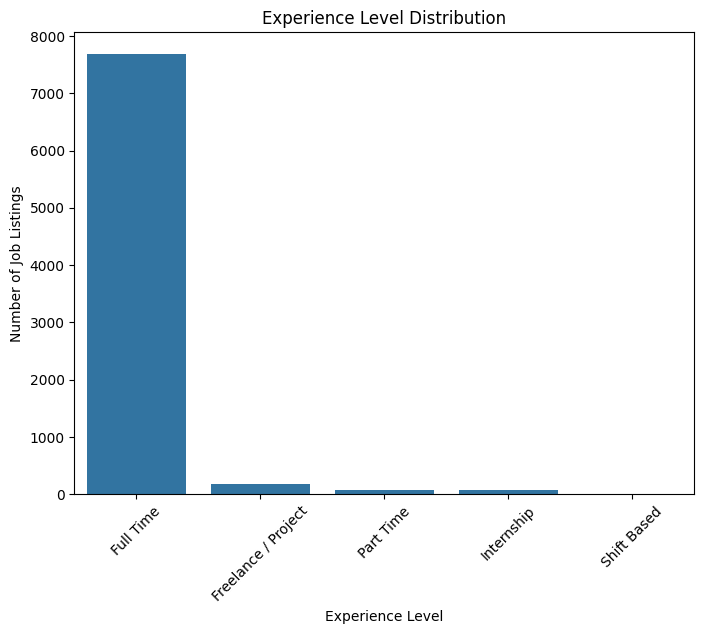

In [59]:

exp_level_counts = wuzzuf['exp_level'].value_counts()

# Plotting Experience Level Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='exp_level', data=wuzzuf, order=exp_level_counts.index)
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=45)
plt.show()

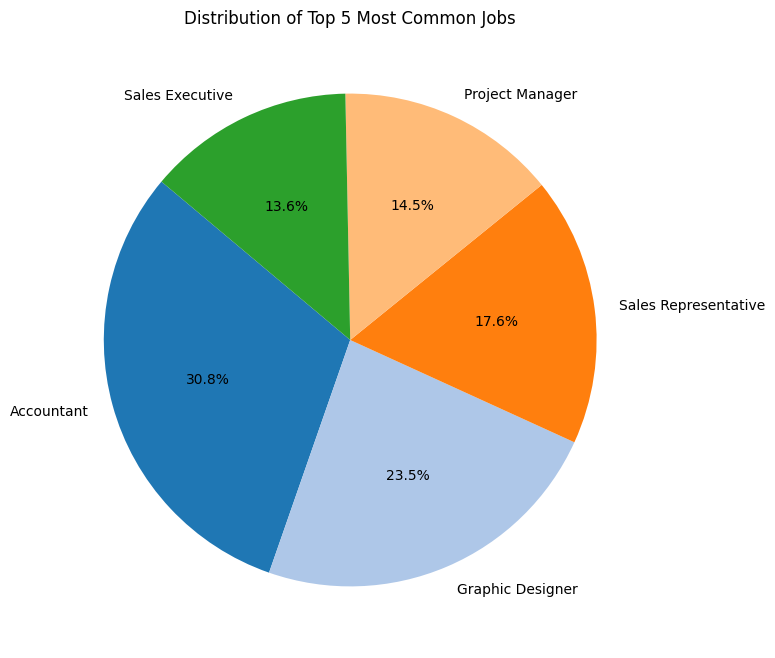

In [51]:
job_counts = wuzzuf['job_name'].value_counts()

top_n_jobs = job_counts.head(5)
# Plotting the top 5 most common jobs as a pie plot
plt.figure(figsize=(8, 8))
plt.pie(top_n_jobs, labels=top_n_jobs.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Top 5 Most Common Jobs')
plt.show()

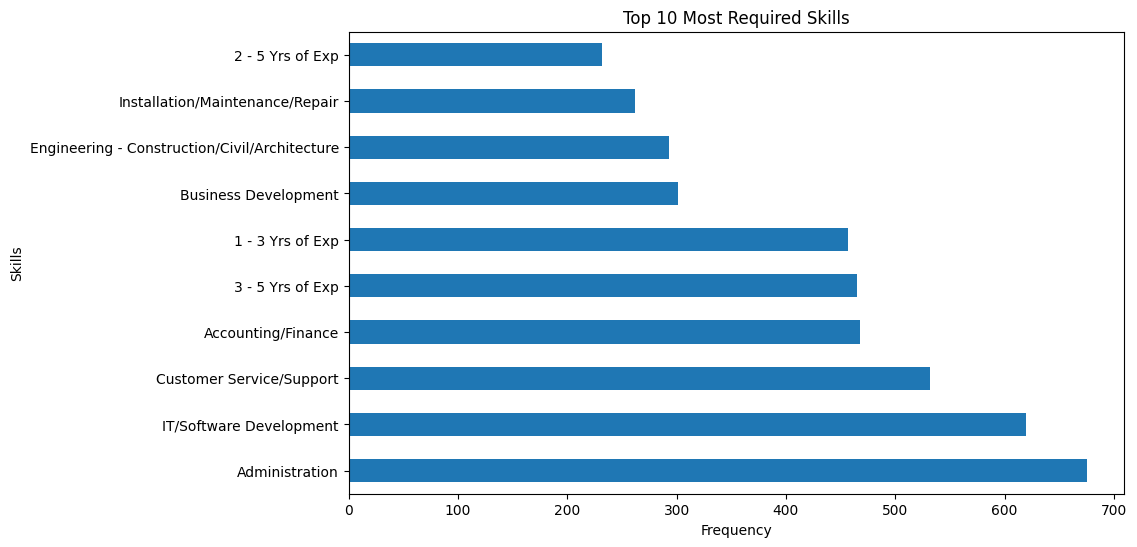

In [55]:
# Split the skills and create a list of all skills
all_skills = [skill.strip() for sublist in wuzzuf['skills'].str.split(',') for skill in sublist]
# Count the occurrences of each skill

skill_counts = pd.Series(all_skills).value_counts().head(10)

plt.figure(figsize=(10, 6))
skill_counts.plot(kind='barh')
plt.title('Top 10 Most Required Skills')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.show()

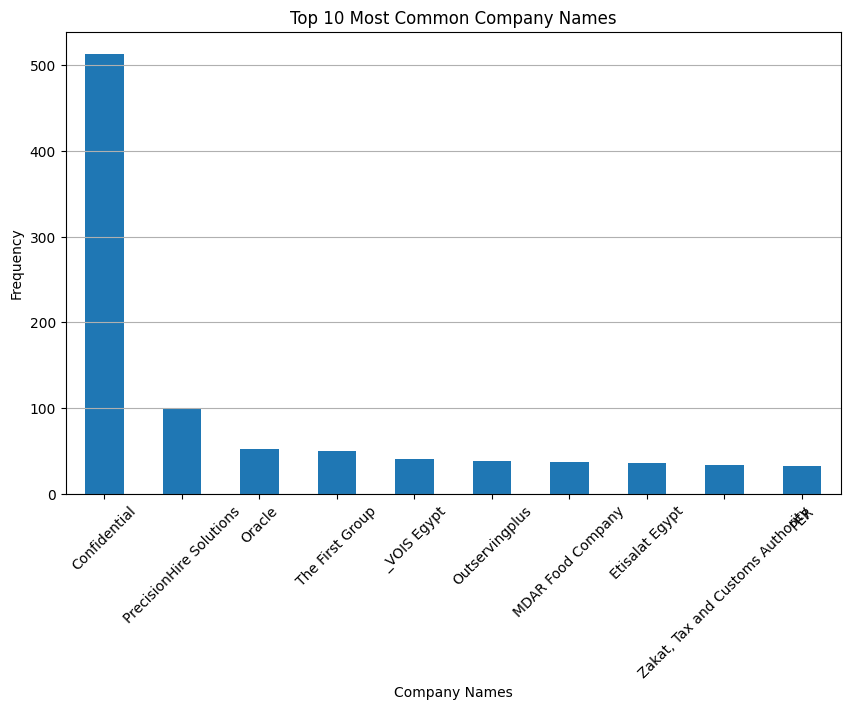

In [57]:
company_counts = wuzzuf['company_name'].value_counts().head(10)

# Plotting the most common company names as a vertical bar plot
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar')
plt.title('Top 10 Most Common Company Names')
plt.xlabel('Company Names')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()